# Training Deep Q-Learning Agents

In [2]:
import gymnasium as gym
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter

from dqn import QAgent

In [3]:
# define environment
env = gym.make('LunarLander-v2', render_mode='rgb_array')

# set seed
seed = 31
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

# define parameters
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
episodes = 200
batch_size = 64

# define and train agent
agent = QAgent(env)
returns, steps = agent.training(env, batch_size, episodes)

env.close()

episode: 1/200, return: -131, epsilon: 0.96, steps: 87
episode: 2/200, return: -139, epsilon: 0.79, steps: 96
episode: 3/200, return: -193, epsilon: 0.65, steps: 99
episode: 4/200, return: -221, epsilon: 0.54, steps: 97
episode: 5/200, return: -222, epsilon: 0.46, steps: 76
episode: 6/200, return: -26, epsilon: 0.36, steps: 124
episode: 7/200, return: -252, epsilon: 0.26, steps: 158
episode: 8/200, return: -131, epsilon: 0.22, steps: 96
episode: 9/200, return: -191, epsilon: 0.17, steps: 119
episode: 10/200, return: -254, epsilon: 0.12, steps: 198
episode: 11/200, return: 233, epsilon: 0.05, steps: 423
episode: 12/200, return: -251, epsilon: 0.04, steps: 148
episode: 13/200, return: -283, epsilon: 0.03, steps: 86
episode: 14/200, return: -345, epsilon: 0.02, steps: 188
episode: 15/200, return: -153, epsilon: 0.02, steps: 120
episode: 16/200, return: -50, epsilon: 0.01, steps: 170
episode: 17/200, return: 4, epsilon: 0.01, steps: 334
episode: 18/200, return: -167, epsilon: 0.01, steps: 

In [4]:
print(f'Average return: {np.mean(returns)}')
print(f'Average return last 50 episodes: {np.mean(returns[-50:])}')

Average return: -66.60562014961073
Average return last 50 episodes: -12.31734724064222


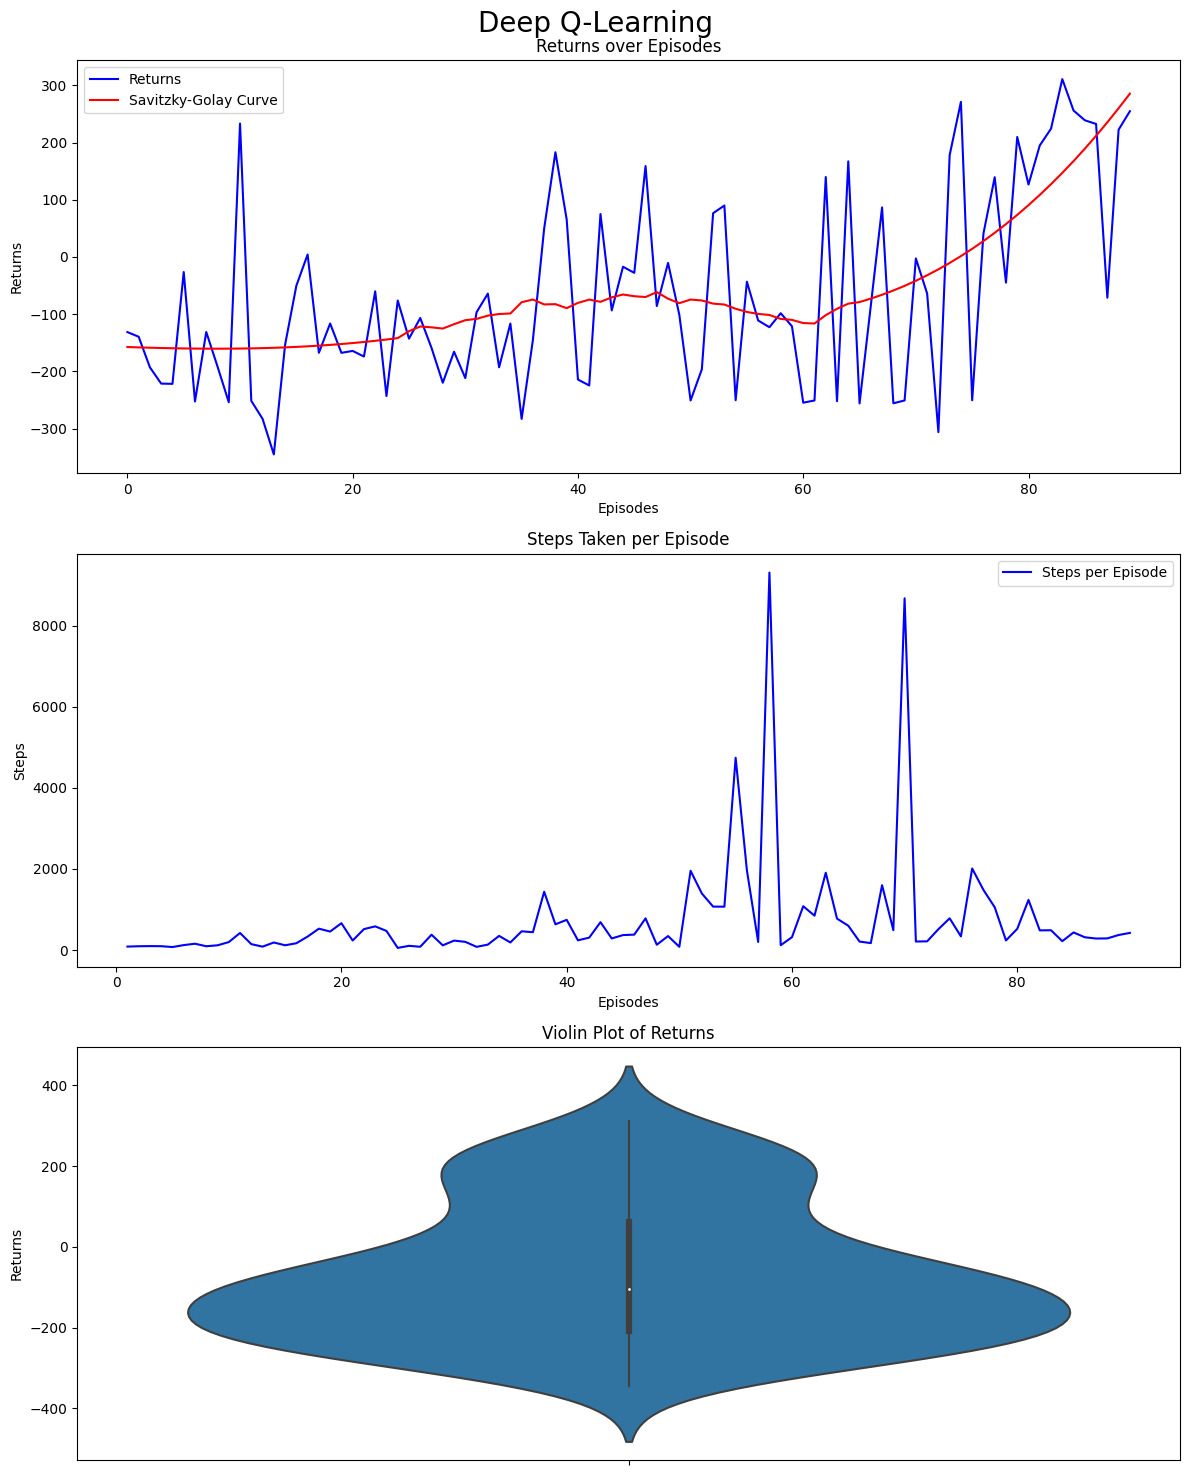

In [5]:
# Determine the window length based on the size of the data
window_length = min(50, len(returns))

# Apply Savitzky-Golay filter
smoothed_returns = savgol_filter(returns, window_length=window_length, polyorder=3)
# MA = pd.series(returns).rolling(window=100).mean()

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Plot returns and smoothed returns
sns.lineplot(data=returns, label='Returns', color='blue', ax=axs[0])
sns.lineplot(data=smoothed_returns, label='Savitzky-Golay Curve', color='red', ax=axs[0])
# sns.lineplot(data=MA, label='Smoothed Returns', color='red', ax=axs[0])
axs[0].set_ylabel('Returns')
axs[0].set_xlabel('Episodes')
axs[0].set_title('Returns over Episodes')
axs[0].legend()

# Plot steps taken per episode
sns.lineplot(x=steps.keys(), y=steps.values(), label='Steps per Episode', color='blue', ax=axs[1])
axs[1].set_ylabel('Steps')
axs[1].set_xlabel('Episodes')
axs[1].set_title('Steps Taken per Episode')
axs[1].legend()

# Plot violin plot of returns
sns.violinplot(y=returns, ax=axs[2])
axs[2].set_ylabel('Returns')
axs[2].set_title('Violin Plot of Returns')

plt.suptitle('Deep Q-Learning', fontsize=20)
plt.tight_layout()
plt.show()

In [6]:
# Save
torch.save(agent.model.state_dict(), 'Trained_Agents/DQN_Agent.pth')
torch.save(agent.target_model.state_dict(), 'Trained_Agents/DQN_target_model.pth')